 1. In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer M (Malignant)  and B (Bengin)
 2. This analysis has been done using Basic Machine Learning Algorithm with detailed explanation
 3. This is good for beginners like as me Lets start.
 
4.Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

-3-32.Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)

5  here 3- 32 are divided into three parts first is Mean (3-13),  Stranded Error(13-23) and  Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension) 

 6. Here Mean means the means of the all cells,  standard Error of all cell and worst means the worst  cell 

In [3]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
import sklearn as sk 

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

**Import data **

In [4]:
data = pd.read_csv("../input/data.csv",header=0)# here header 0 means the 0 th row is our coloumn 
                                                # header in data

In [5]:
# have a look at the data
print(data.head(2))# as u can see our data have imported and having 33 columns
# head is used for to see top 5 by default I used 2 so it will print 2 rows
# If we will use print(data.tail(2))# it will print last 2 rows in data

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

In [6]:
# now lets look at the type of data we have. We can use 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

*As I said I m beginner, so here I am explaining every thing in detail.

 1.So lets describe what these data type means, e.g 5 radius_mean 569 non-null float64 that means the radius_mean have 569 float type value.

2. Now we can see Unnamed:32 have 0 non null object it means the all values are null in this column so we cannot use this column for our analysis*

In [7]:
# now we can drop this column Unnamed: 32
#data.drop(['Unnamed: 32'], 1, inplace=True) 
#data.drop(columns=['Unnamed: 32'])
#data.drop('Unnamed:32',axis=1) # in this process this will change in our data itself 
# if you want to save your old data then you can use below code
# data1=data.drop("Unnamed:32",axis=1)
# here axis 1 means we are droping the column

In [8]:
# here you can check the column has been droped
data.columns # this gives the column name which are persent in our data no Unnamed: 32 is not now there

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
# like this we also don't want the Id column for our analysis
#data.drop("id",axis=1,inplace=True)
data.drop(data.columns[[1]], axis=1)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06

In [10]:
# As I said above the data can be divided into three parts.lets divied the features according to their category
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']
-----------------------------------
['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se']
------------------------------------
['fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [11]:
# lets now start with features_mean 
# now as ou know our diagnosis column is a object type so we can map it to integer value
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

## Explore the Data now

In [12]:
data.describe() # this will describe the all statistical function of our data

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave points_mean  ...  texture_worst  perimeter_worst   area_worst  \
count           569.000000  ...     569.000000       569.000000   569.000000   
mean              0.048919  ...      25.677223       107.261213   880.583128   
std               0.038803  ...       6.146258        33.602542   569.356993   
min               0.000000  ...      12.020000        50.410000   185.200000   
25%               0.020310  ...      21.080000        84.110000   515.300000   
50%               0.033500  ...      25.410000        97.660000   686.500000   
75%               0.074000  ...      29.720000       125.400000  1084.000000   
max               0.201200  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 33 columns]

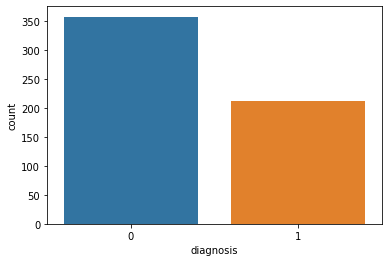

In [13]:
# lets get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")

In [14]:
# from this graph we can see that there is a more number of bengin stage of cancer which can be cure

## Data Analysis a little feature selection

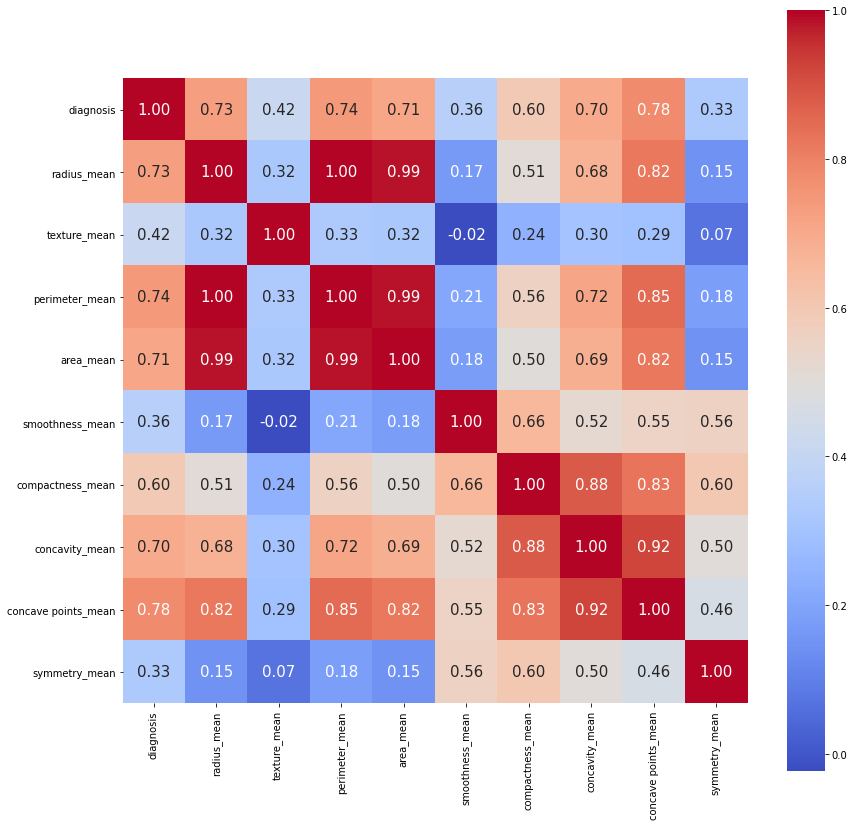

In [15]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

*observation*

 - the radius, parameter and area  are highly correlated as expected from their relation*
    so from these we will use anyone of them *
 - *compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here *
 - so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean*

In [16]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [17]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 33)
(171, 33)


In [18]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [19]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [20]:
model.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [22]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.8888888888888888

* Here the Accuracy for our model is 91 % which seems good*

In [23]:
# lets now try with SVM

In [24]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8654970760233918

**SVM is giving only 0.85 which we can improve by using different techniques** 
**i will improve it till then beginners can understand how to model a data and they can have a overview of ML**

*Now lets do this for all feature_mean so that from Random forest we can get the feature which are important**

In [25]:
prediction_var = features_mean # taking all features

In [26]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [27]:
model=RandomForestClassifier(n_estimators=100)

In [28]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

1.0

 - by taking all features accuracy increased but not so much so according to Razor's rule simpler method is better
 - by the way now lets check the importan features in the prediction

In [29]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

diagnosis              0.445359
concave points_mean    0.147357
area_mean              0.114884
concavity_mean         0.096709
perimeter_mean         0.086057
radius_mean            0.079367
texture_mean           0.012012
smoothness_mean        0.008298
compactness_mean       0.006510
symmetry_mean          0.003445
dtype: float64


In [30]:
# first lets do with SVM also using all features

In [31]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8654970760233918

In [32]:
# as you can see the accuracy of SVM decrease very much
# now lets take only top 5 important features given by RandomForest classifier

In [33]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      

In [34]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [35]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9064327485380117

In [36]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8654970760233918

In [37]:
# so from this discussion we got multi colinearty effecting our SVM part a lot 
# but its not affecting so much randomforest because for random forest we dont need to make so much effort for our analysis part
# now lets do with the 3rd part of data which is worst
# first start with all features_worst

In [38]:
prediction_var = features_worst

In [39]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [40]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8888888888888888

In [41]:
# but same problem With SVM, very much less accuray I think we have to tune its parameter
# that i will do later in intermidate part
#now we can get the important features from random forest now run Random Forest for it 

In [42]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9415204678362573

In [43]:
# the accuracy for RandomForest invcrease it means the value are more catogrical in Worst part
#lets get the important features
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

perimeter_worst         0.290727
radius_worst            0.205222
area_worst              0.185503
concave points_worst    0.139224
compactness_worst       0.048027
concavity_worst         0.044202
symmetry_worst          0.031033
texture_worst           0.030571
smoothness_worst        0.018049
fractal_dimension_se    0.007443
dtype: float64


In [44]:
# same parameter but with great importance and here it seamed the only conacve points_worst is making 
# very important so it may be bias lets check only for top 5 important features

In [45]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [46]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [47]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.935672514619883

In [48]:
#check for SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8888888888888888

In [49]:
# now I think for simplicity the Randomforest will be better for prediction

In [50]:
# Now explore a little bit more
# now from features_mean i will try to find the variable which can be use for classify
# so lets plot a scatter plot for identify those variable who have a separable boundary between two class
#of cancer

In [51]:
# Lets start with the data analysis for features_mean
# Just try to understand which features can be used for prediction
# I will plot scatter plot for the all features_mean for both of diagnosis Category
# and from it we will find which are easily can used for differenciate between two category

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

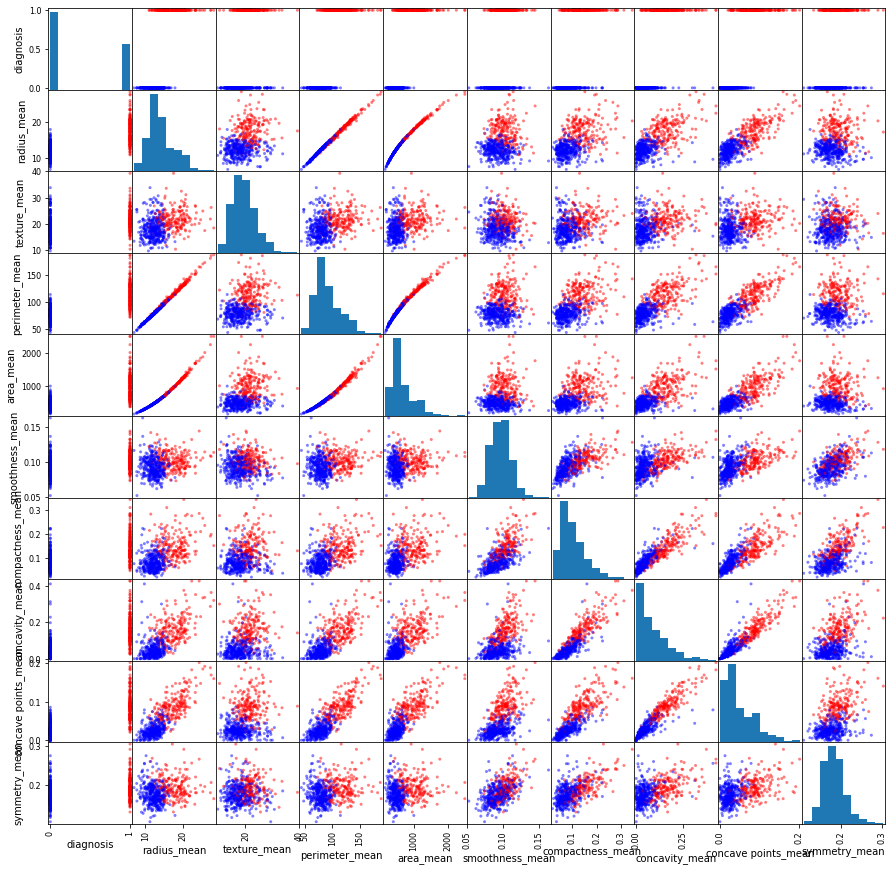

In [52]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

** Observation**

** 1. Radius, area and perimeter have a strong linear relationship as expected
     2 As graph shows the features like as texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean can t be used for classify two category because both category are mixed there is no separable plane
3. So we can remove them from our prediction_var**

In [53]:
# So predicton features will be 
features_mean

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean']

In [54]:
# So predicton features will be 
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [55]:
# Now with these variable we will try to explore a liitle bit we will move to how to use cross validiation
# for a detail on cross validation use this link https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/

In [56]:
def model(model,data,prediction,outcome):
    # This function will be used for to check accuracy of different model
    # model is the m
    kf = KFold(data.shape[0], n_folds=10) # if you have refer the link then you must understand what is n_folds
    

In [57]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [58]:
# so those features who are capable of classify classe will be more useful

In [59]:
# so in this part i am going to explain about only some concept of machine learnig 
# here I will also compare the accuracy of different models
# I will First use cross validation with different model
# then I will explain about how to to tune the parameter of models using gridSearchCV 

In [60]:
# As we are going to use many models lets make a function
# Which we can use with different models

def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    #prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    #comparison for same data
    #Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print(data.shape[0])
 
   # sklearn.model_selection.KFold(n_splits=3, shuffle=False, random_state=None)
    kf = KFold(data.shape[0],shuffle=True, random_state = 100)
    #kf = KFold(data.shape[0],n_fold=10)
   # kf = StratifiedKFold(y=train,n_splits = 5, random_state = 2017)
    #kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
    # About cross validitaion please follow this link
    #https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    #let me explain a little bit data.shape[0] means number of rows in data
    #n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    
    

In [61]:
# Now from Here start using different model

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


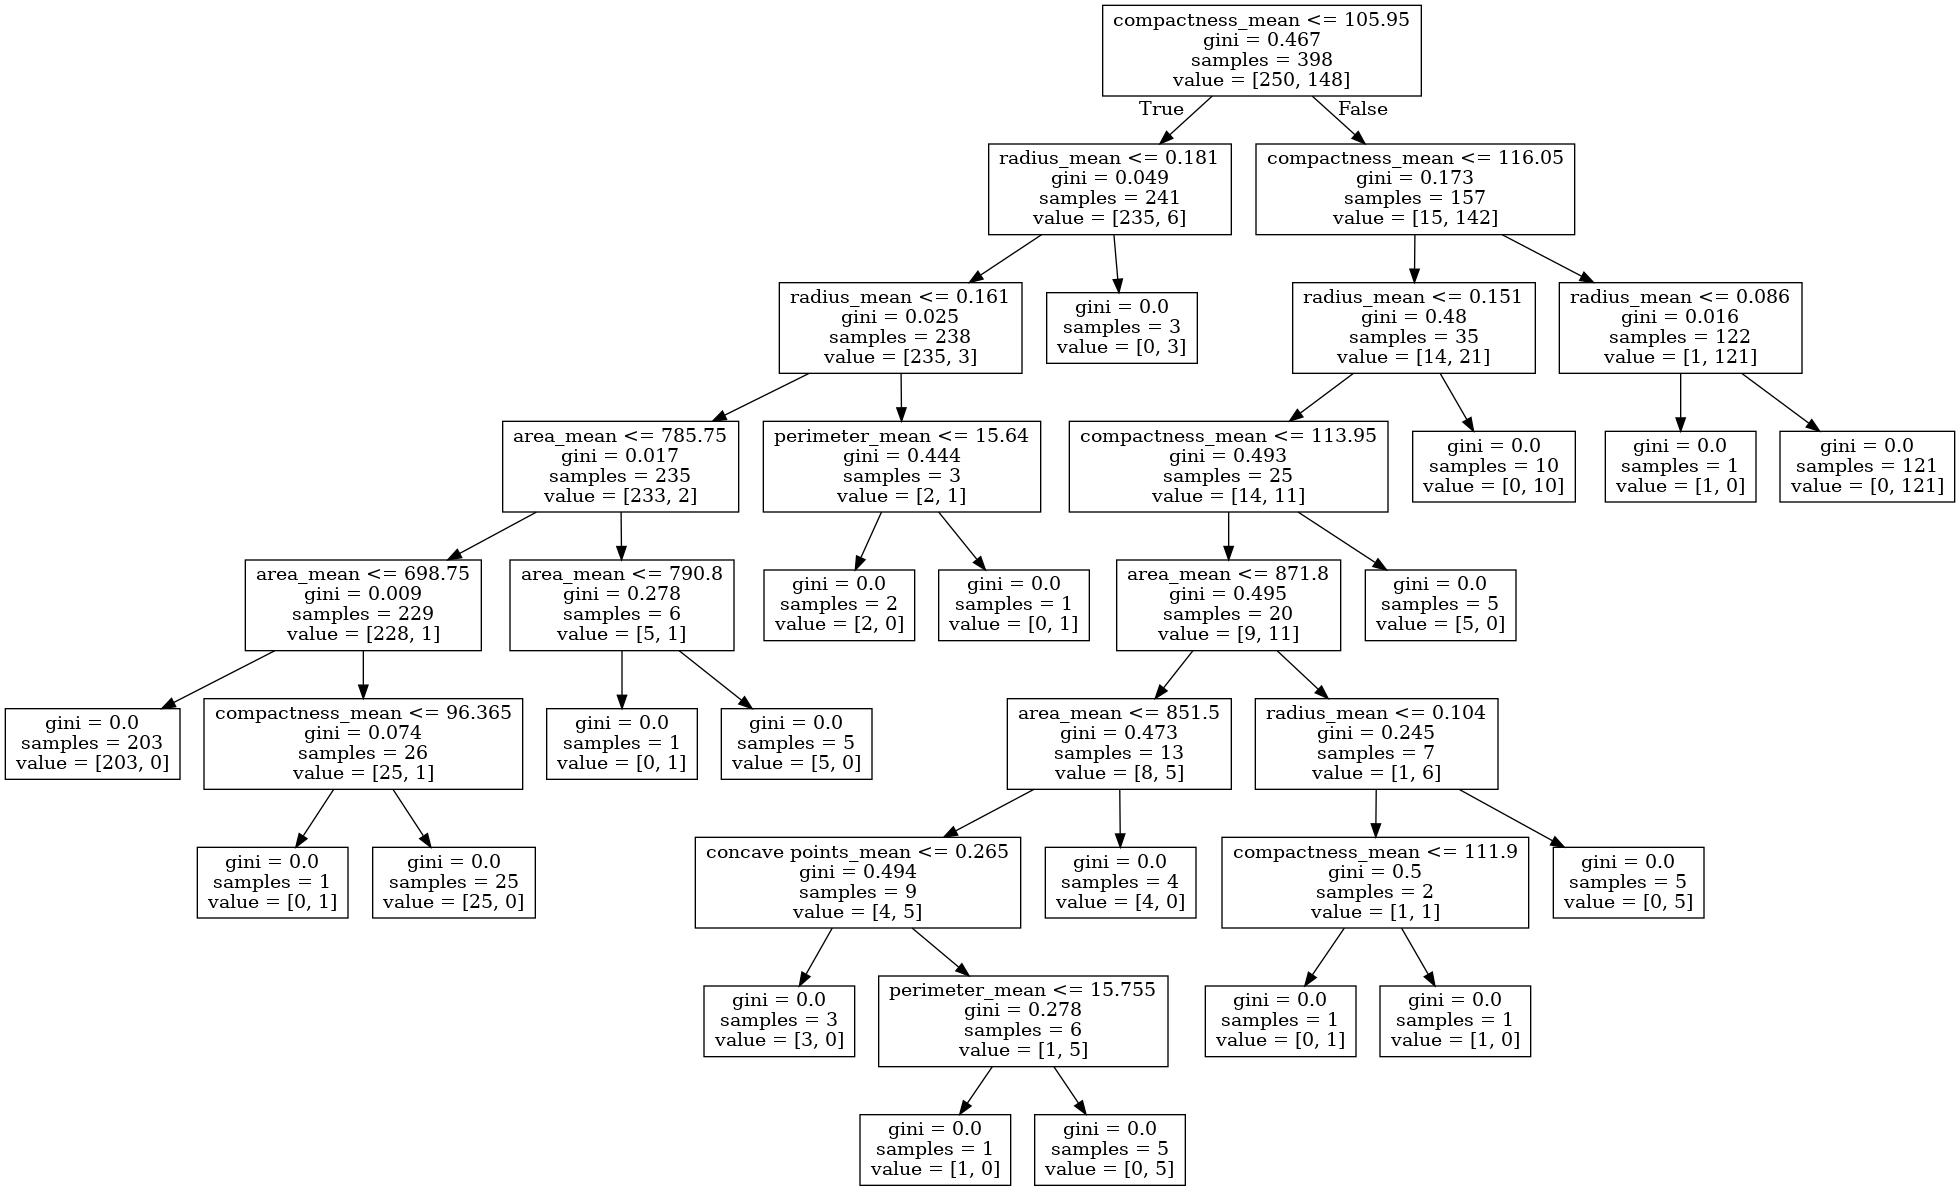

In [62]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
dt = DecisionTreeClassifier()
dt.fit(train_X,train_y)
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var= "diagnosis"
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=prediction_var)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**observation

 1. Accuracy is 100 % means over fitting 
 2. but cross validation scores are not good
 3 so accuracy cant be considered only factor here

In [63]:
# I am facing problem with SVM dont know why?
#lets leave that we will try to do it later 
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_X, train_y)

#Predict the response for test dataset
y_pred = clf.predict(test_X)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_y, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.9005847953216374
Precision: 0.8852459016393442
Recall: 0.84375


In [64]:
#RNN
import numpy as np
import matplotlib.pyplot as plt
import numpy
from keras.layers import Activation, Dense
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from keras.layers import LeakyReLU
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
import keras
from sklearn.metrics import mean_squared_error
train_X = train_X/255.0
test_X = test_X/255.0

print(train_X.shape)
model = Sequential()
dim = train_X.shape[1]
print(dim)
#Layer 1
model.add(Dense(32, input_dim = dim))
model.add(LeakyReLU())
model.add(Dropout(0.25))
#Layer 2
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dropout(0.25))
#output layer
#model.add(Dense(2))
#model.add(Dense(1, activation='relu'))
#model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])

#Fit/Train the model
bsize = 32  
model.fit(train_X, train_y, batch_size = bsize, epochs = 50, verbose = 1,validation_data = (test_X, test_y))


Using TensorFlow backend.


(398, 5)
5
Train on 398 samples, validate on 171 samples
Epoch 1/50
398/398 [==============================] - 0s 1ms/step - loss: 0.7216 - accuracy: 0.5503 - val_loss: 0.6585 - val_accuracy: 0.4035
Epoch 2/50
398/398 [==============================] - 0s 72us/step - loss: 0.6696 - accuracy: 0.5402 - val_loss: 0.6345 - val_accuracy: 0.7135
Epoch 3/50
398/398 [==============================] - 0s 70us/step - loss: 0.6394 - accuracy: 0.6106 - val_loss: 0.6153 - val_accuracy: 0.8187
Epoch 4/50
398/398 [==============================] - 0s 69us/step - loss: 0.6077 - accuracy: 0.7111 - val_loss: 0.5982 - val_accuracy: 0.8187
Epoch 5/50
398/398 [==============================] - 0s 68us/step - loss: 0.5910 - accuracy: 0.7236 - val_loss: 0.5766 - val_accuracy: 0.8772
Epoch 6/50
398/398 [==============================] - 0s 67us/step - loss: 0.5666 - accuracy: 0.7663 - val_loss: 0.5542 - val_accuracy: 0.8596
Epoch 7/50
398/398 [==============================] - 0s 69us/step - loss: 0.5448 - ac

In [65]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()
B, M = data['diagnosis'].value_counts()
trace1 = go.Bar(y = (M, B), x = ['malignant', 'benign'],opacity = 0.8)


trace2 = go.Pie(labels = ['Benign','Malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8)


py.iplot([trace2])

In [66]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x=data.iloc[:,1:]
#normalize x
x=(x-np.min(x))/(np.max(x)-np.min(x))


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


updated cost is 0.7295646243667713
updated cost is 0.037985225577175576
updated cost is 0.02056439553154325


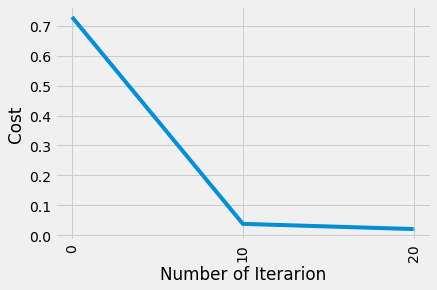

Accuracy: 100.0 %


In [68]:
def initial(dimension):
    w= np.full([dimension,1],0.01)
    b=0
    return w,b
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head
def ForwardBackward(w,b,x_train,y_train):
    z= np.dot(w.T,x_train)+b
    y_head = sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients
def Update(w,b,x_train,y_train,learning,itnumber):
    index=[]
    cost_list=[]
    for i in range(itnumber):
        cost,gradients=ForwardBackward(w,b,x_train,y_train)
        w=w-learning*gradients["derivative_weight"]
        b=b-learning*gradients["derivative_bias"]
        if(i%10==0):
            cost_list.append(cost)
            index.append(i)
            print("updated cost is {}".format(cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, cost_list
def Predict(w,b,x_test):
    z=np.dot(w.T,x_test)+b
    z_=sigmoid(z)
    y_predict=np.zeros((1,x_test.shape[1]))
    for i in range(z_.shape[1]):
        if z[0,i]<=0.5:
            y_predict[0,i]=0
        else:
            y_predict[0,i]=1
    return y_predict


    
def LogReg(x_train,y_train,x_test,y_test,learning,itnumber):
    dim=x_train.shape[0]
    w,b = initial(dim)
    parameters,cost_list=Update(w,b,x_train,y_train,learning,itnumber)
    y_predict=Predict(parameters["weight"],parameters["bias"],x_test)
    print("Accuracy: {} %".format(100 - np.mean(np.abs(y_predict - y_test)) * 100))
import matplotlib.pyplot as plt
LogReg(x_train,y_train,x_test,y_test,learning=1,itnumber=30)

updated cost is 0.7295646243667713
updated cost is 0.0210500925614732
updated cost is 0.011812432840701895
updated cost is 0.00826920148468726
updated cost is 0.006381212058604781
updated cost is 0.005204228705884939
updated cost is 0.004398715677083958
updated cost is 0.0038120632813915044
updated cost is 0.003365362761039534
updated cost is 0.0030136519068215844
updated cost is 0.002729408815620141
updated cost is 0.002494831748733785
updated cost is 0.0022978900815488644
updated cost is 0.002130157647994153
updated cost is 0.001985554957800339
updated cost is 0.0018595842507776043
updated cost is 0.0017488457499146078
updated cost is 0.001650721392100215
updated cost is 0.0015631620328476448
updated cost is 0.0014845406431533042
updated cost is 0.0014135487783342587
updated cost is 0.001349122124139043
updated cost is 0.0012903860116564572
updated cost is 0.0012366149155003563
updated cost is 0.0011872019171065289
updated cost is 0.0011416353832593052
updated cost is 0.0010994809447

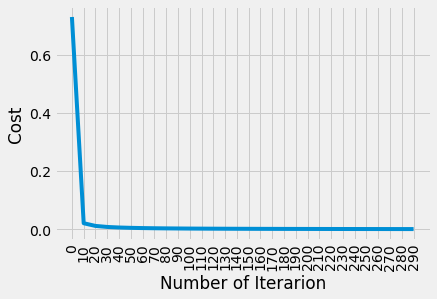

Accuracy: 100.0 %


In [69]:
LogReg(x_train,y_train,x_test,y_test,learning=1.7,itnumber=300)

In [70]:
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [71]:
model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [72]:
grid.fit(train_X, train_y)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standard_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
  

In [73]:
#Make predictions on training set:
predictions = grid.predict(train_X)
  
    #Print accuracy
    # now checkin accuracy for same data
accuracy = metrics.accuracy_score(predictions,train_y)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 95.980%


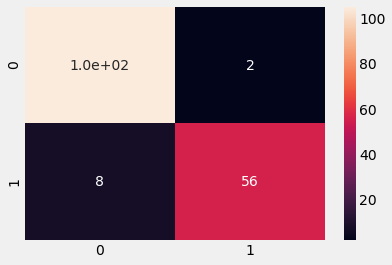

In [74]:
y_pred = grid.predict(test_X)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
   

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
import keras
from keras.layers import Input, Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, input_dim=5))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('softmax'))
model.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X,train_y, epochs=20, batch_size=32, validation_data=(test_X, test_y))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`



Train on 398 samples, validate on 171 samples
Epoch 1/20
398/398 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.8266 - val_loss: 0.6904 - val_accuracy: 0.6842
Epoch 2/20
398/398 [==============================] - 0s 121us/step - loss: 0.6730 - accuracy: 0.9121 - val_loss: 0.6864 - val_accuracy: 0.7485
Epoch 3/20
398/398 [==============================] - 0s 123us/step - loss: 0.6634 - accuracy: 0.8920 - val_loss: 0.6830 - val_accuracy: 0.7544
Epoch 4/20
398/398 [==============================] - 0s 122us/step - loss: 0.6545 - accuracy: 0.8970 - val_loss: 0.6795 - val_accuracy: 0.7544
Epoch 5/20
398/398 [==============================] - 0s 119us/step - loss: 0.6448 - accuracy: 0.9070 - val_loss: 0.6755 - val_accuracy: 0.7895
Epoch 6/20
398/398 [==============================] - 0s 118us/step - loss: 0.6358 - accuracy: 0.9146 - val_loss: 0.6689 - val_accuracy: 0.8304
Epoch 7/20
398/398 [==============================] - 0s 124us/step - loss: 0.6261 - accurac

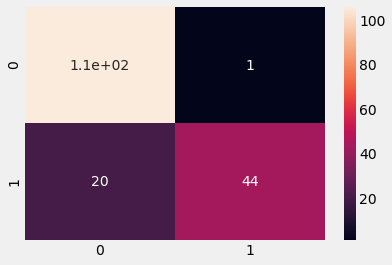

In [76]:
y_pred = model.predict(test_X)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [77]:
# Testing Options
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
seed = 8
scoring = 'accuracy'

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = None)
    cv_results = model_selection.cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.917115 (0.038827)
SVM: 0.932244 (0.035321)


In [82]:
# Make predictions on validation dataset
from sklearn.metrics import classification_report



In [83]:
from sklearn.svm import SVC
clf = SVC()

clf.fit(train_X, train_y)
accuracy = clf.score(test_X, test_y)
print(accuracy)

0.8888888888888888


In [86]:

predictions = clf.predict(test_X)
#print(name)
print(accuracy_score(test_y, predictions))
print(classification_report(test_y, predictions))

0.8888888888888888
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       107
           1       0.91      0.78      0.84        64

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171

